https://www.kaggle.com/furkankati/person-segmentation-dataset?select=Training

https://www.kaggle.com/tapakah68/supervisely-filtered-segmentation-person-dataset?select=supervisely_person_clean_2667_img

https://www.kaggle.com/oishee30/cocopersonsegmentation?select=train2017_ann

# Kaggle API

https://www.kaggle.com/docs/api

https://www.kaggle.com/general/74235

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"gaurav2022","key":"2a7cb2a3c1601143a171b90b96b01a86"}'}

In [4]:
! mkdir ~/.kaggle                 #make directory(folder) named .kaggle

! cp kaggle.json ~/.kaggle/       #add file to that folder

! chmod 600 ~/.kaggle/kaggle.json        #Change the permissions of the file.

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           3757  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-26 11:18:15           1844  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            365  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            222  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2020                  2KB  2020-02-

Download Data

`! kaggle competitions download -c 'name-of-competition'`

Use unzip command to unzip the data:

For example,

Create a directory named train,

`! mkdir train`

unzip train data there,

`! unzip train.zip -d train`

In [6]:
! kaggle datasets [-h]

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: '[-h]' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


## Download Data

In [7]:
! kaggle datasets download furkankati/person-segmentation-dataset

person-segmentation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
import os

os.listdir('/content')

['.config',
 'person-segmentation-dataset.zip',
 'kaggle (1).json',
 'data',
 'drive',
 'kaggle.json',
 'sample_data']

In [ ]:
! mkdir data        #making directory data

! unzip person-segmentation-dataset.zip -d data            #unzipping data into data directory

In [26]:
os.listdir('/content')

['.config',
 'person-segmentation-dataset.zip',
 'kaggle (1).json',
 'data',
 'drive',
 'kaggle.json',
 'sample_data']

In [27]:
os.listdir('/content/data')

['UnetColor_kaggle_89832_8.hdf5', 'Training']

In [28]:
os.listdir('/content/data/Training')

['input', 'Output']

In [29]:
path = '/content/data/Training'
for folder in os.listdir(path):
  print('No of images in',folder,len(os.listdir(path+'/'+folder)))

No of images in input 89832
No of images in Output 89832


# Now we have dataset to work on. Let's start by importing necessary libraries 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from PIL import Image        #pillow for images

In [31]:
X = sorted(os.listdir('/content/data/Training/input'))
Y = sorted(os.listdir('/content/data/Training/Output'))

In [32]:
X[:4],Y[:4]

(['0_0000006.jpg', '0_0000007.jpg', '0_0000008.jpg', '0_0000010.jpg'],
 ['0_0000006.png', '0_0000007.png', '0_0000008.png', '0_0000010.png'])

In [33]:
x_path = '/content/data/Training/input'
y_path = '/content/data/Training/Output'

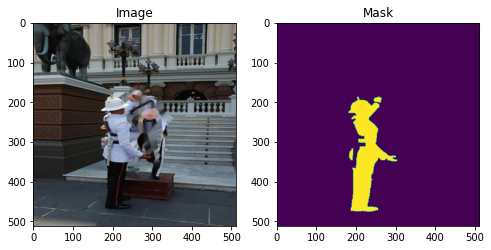

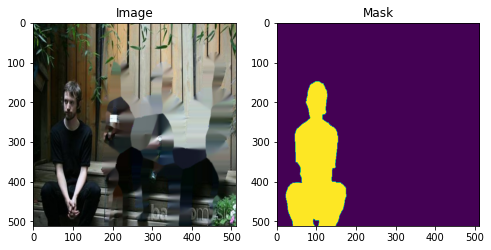

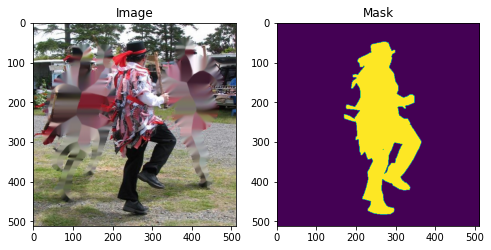

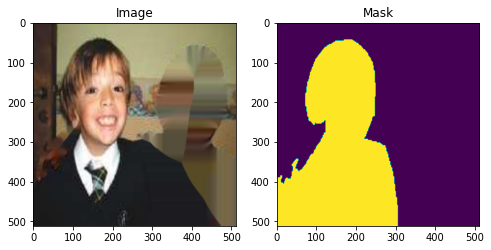

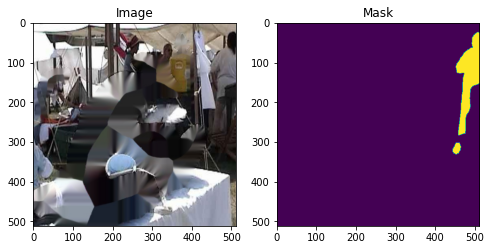

In [34]:
for x,y in zip(X[0:5],Y[0:5]):
  fig = plt.figure(figsize=(8,4))
  fig.tight_layout()

  plt.subplot(1,2,1)
  img = plt.imread(x_path+'/'+x)
  plt.imshow(img)
  plt.title('Image')

  plt.subplot(1,2,2)
  img = plt.imread(y_path+'/'+y)
  plt.imshow(img)
  plt.title('Mask')

  plt.show()
  print()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


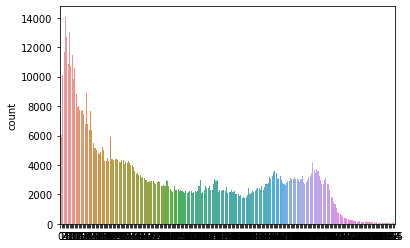

In [35]:
img = plt.imread(x_path+'/'+X[1])
print(np.unique(img))
print(img.shape)
sns.countplot(img.ravel())
plt.show()

[0. 1.]
(512, 512)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


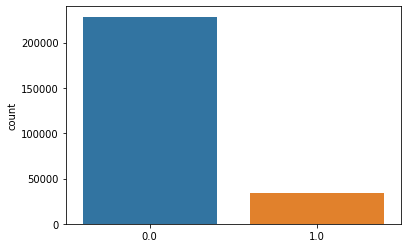

In [36]:
img = plt.imread(y_path+'/'+Y[1])
print(np.unique(img))
print(img.shape)
sns.countplot(img.ravel())
plt.show()

##Prepare Datset for Deep Learning

In [37]:
import tensorflow as tf
import keras

In [38]:
def sum(a,b): 
    return a+b 
  
lst1=[2,4,6,8] 
lst2=[1,3,5,7,9] 
  
result=list(map(sum,lst1,lst2)) 
print(result) 

[3, 7, 11, 15]


In [39]:
mask = plt.imread(y_path+'/'+'0_0000006.png')
print(mask.shape)
print(mask.reshape(mask.shape+(1,)).shape)

(512, 512)
(512, 512, 1)


In [ ]:
x_path = '/content/data/Training/input'
y_path = '/content/data/Training/Output'

x_data = []
y_data = []

for x,y in zip(X[:10000],Y[:10000]):

  image = plt.imread(x_path+'/'+x)
  mask = plt.imread(y_path+'/'+y)
  mask = mask.reshape(mask.shape+(1,))
  
  x_data.append(image)
  y_data.append(mask)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))

In [ ]:
dataset

In [ ]:
len(dataset)

In [ ]:
def load_image(image, mask):
  input_image = tf.image.resize(image, (256, 256))
  input_mask = tf.image.resize(mask, (256, 256))

  input_image = tf.cast(input_image, tf.float32) / 255.0 

  return input_image, input_mask 

In [ ]:
train = dataset.map(load_image)

In [ ]:
train

In [ ]:
dataset_size = len(images)
train_size = int(0.8 * dataset_size)
val_size = int(0.2 * dataset_size)

x_train = images.take(train_size)
y_train = labels.take(train_size)
x_test = images.skip(train_size)
y_test = labels.skip(train_size)

In [ ]:
train_dataset = train.cache().shuffle(500).batch(64)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_dataset

## Unet model

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
input_layer = layers.Input(shape = [256,256,3])

conv1 = layers.Conv2D(32, 3, padding="same", activation="relu")(input_layer)
conv1 = layers.Conv2D(32, 3, padding="same", activation="relu")(conv1)
pool1 = layers.MaxPooling2D(2)(conv1)

conv2 = layers.Conv2D(64, 3, padding="same", activation="relu")(pool1)
conv2 = layers.Conv2D(64, 3, padding="same", activation="relu")(conv2)
pool2 = layers.MaxPooling2D(2)(conv2)

conv3 = layers.Conv2D(128, 3, padding="same", activation="relu")(pool2)
conv3 = layers.Conv2D(128, 3, padding="same", activation="relu")(conv3)
pool3 = layers.MaxPooling2D(2)(conv3)

conv4 = layers.Conv2D(256, 3, padding="same", activation="relu")(pool3)
conv4 = layers.Conv2D(256, 3, padding="same", activation="relu")(conv4)
pool4 = layers.MaxPooling2D(2)(conv4)

#Bottom
conv5 = layers.Conv2D(512, 3, padding="same", activation="relu")(pool4)
conv5 = layers.Conv2D(512, 3, padding="same", activation="relu")(conv5)

#upsampling
deconv4 = layers.Conv2DTranspose(256, 3, strides=2, padding="same")(conv5)
unconv4 = layers.concatenate([deconv4, conv4])
unconv4 = layers.Conv2D(256, 3, padding="same", activation="relu")(unconv4)
unconv4 = layers.Conv2D(256, 3, padding="same", activation="relu")(unconv4)

deconv3 = layers.Conv2DTranspose(128, 3, strides=2, padding="same")(unconv4)
unconv3 = layers.concatenate([deconv3, conv3])
unconv3 = layers.Conv2D(128, 3, padding="same", activation="relu")(unconv3)
unconv3 = layers.Conv2D(128, 3, padding="same", activation="relu")(unconv3)

deconv2 = layers.Conv2DTranspose(64, 3, strides=2, padding="same")(unconv3)
unconv2 = layers.concatenate([deconv2, conv2])
unconv2 = layers.Conv2D(64, 3, padding="same", activation="relu")(unconv2)
unconv2 = layers.Conv2D(64, 3, padding="same", activation="relu")(unconv2)

deconv1 = layers.Conv2DTranspose(32, 3, strides=2, padding="same")(unconv2)
unconv1 = layers.concatenate([deconv1, conv1])
unconv1 = layers.Conv2D(32, 3, padding="same", activation="relu")(unconv1)
unconv1 = layers.Conv2D(32, 3, padding="same", activation="relu")(unconv1)

output_layer = layers.Conv2D(1, 3, padding="same", activation="sigmoid")(unconv1)

model = keras.Model(input_layer, output_layer)
model.summary()

In [ ]:
from datetime import datetime 

datetime.now().strftime("%d-%m-%y")

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss="binary_crossentropy")

callbacks = [keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Background_remover/model' + datetime.now().strftime("%d-%m-%y") +'.h5',
                                             save_best_only=True)]

# Train the model, doing validation at the end of each epoch.
epochs = 5
model_history = model.fit(train_dataset, epochs=epochs, validation_split =.2 , callbacks=callbacks)